In [1]:
import numpy as np
from scipy import ndimage
from scipy import misc
import matplotlib.pyplot as plt


In [2]:
mapache = misc.face()


In [3]:
def get_min_primo(numero, factor):
    if(numero / factor == 1):
        return factor
    elif(numero % factor == 0):
        return get_min_primo(numero / factor, 2)
    else:
        return get_min_primo(numero, factor + 1)

In [4]:
def esta_completo(puzzle):
    return np.array_equal(mapache, puzzle)

In [5]:
def generar_puzzle(piezas):
    global divisionX
    global divisionY
    divisionY = get_min_primo(int(piezas), 2)
    divisionX = int(int(piezas) / divisionY)
    pieces_slices = cortar_puzzle(mapache)
    np.random.shuffle(pieces_slices)
    return reconstruir_puzzle(pieces_slices)

In [6]:
def cortar_puzzle(puzzle):
    vertical_slices = np.split(puzzle, divisionY)
    handler = 0
    pieces_slices = np.zeros([int(piezas), int(mapache.shape[0] / divisionY), int(mapache.shape[1] / divisionX), 3], dtype=int)
    for slice in vertical_slices:
        horizontal_slices = np.hsplit(slice, divisionX)
        for h_slice in horizontal_slices:
            pieces_slices[handler] = h_slice
            handler += 1
    return pieces_slices

In [7]:
def reconstruir_puzzle(pieces_slices):
    puzzle = np.zeros([divisionY, int(mapache.shape[0] / divisionY), mapache.shape[1], 3], dtype=int)
    for i in range(1, divisionY + 1):
        puzzle[i - 1] = np.concatenate(pieces_slices[(i -1) * divisionX: i * divisionX], 1)
    puzzle_final = np.concatenate(puzzle, 0)
    return puzzle_final

In [8]:
def mostrar_puzzle():
    plt.figure(1)
    plt.subplot(121)
    plt.imshow(puzzle)
    plt.subplot(122)
    plt.imshow(mapache)
    plt.show()

In [9]:
def movimiento(pieza, orden):
    actual_puzzle = cortar_puzzle(puzzle)
    if(orden == 1):
        mover = (pieza - divisionX) % int(piezas)
    elif(orden == 2):
        mover = (pieza + divisionX) % int(piezas)
    elif(orden == 3):
        mover = (pieza - 1) % int(piezas)
    else:
        mover = (pieza + 1) % int(piezas)
    actual_puzzle[[mover, pieza]] = actual_puzzle[[pieza, mover]] 
    return reconstruir_puzzle(actual_puzzle)


In [10]:
def main():
    global piezas
    global puzzle
    piezas = input("Ingrese el número de piezas: ")
    print(f" {piezas}")
    puzzle = generar_puzzle(piezas)
    movimiento_seleccionado = 0

    while(not esta_completo(puzzle)):
        mostrar_puzzle()
        pieza_seleccionada = input(f"Seleccione una pieza [1 - {piezas}]: ")
        print("Seleccione a donde desea desplazar esta pieza:")
        print("1. Arriba")
        print("2. Abajo")
        print("3. Izquierda")
        print("4. Derecha")
        movimiento_seleccionado = int(input("Seleccione una opción: "))
        puzzle = movimiento(int(pieza_seleccionada) - 1, movimiento_seleccionado)
    mostrar_puzzle()
    print("---------Rompecabezas terminado---------")

Ingrese el número de piezas: 6
 6


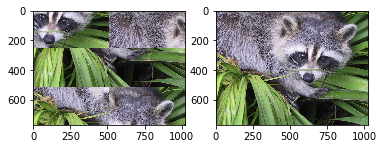

Seleccione una pieza [1 - 6]: 2
Seleccione a donde desea desplazar esta pieza:
1. Arriba
2. Abajo
3. Izquierda
4. Derecha
Seleccione una opción: 1


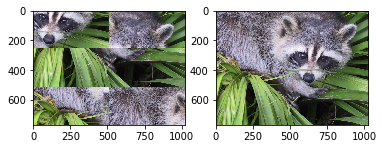

Seleccione una pieza [1 - 6]: 1
Seleccione a donde desea desplazar esta pieza:
1. Arriba
2. Abajo
3. Izquierda
4. Derecha
Seleccione una opción: 2


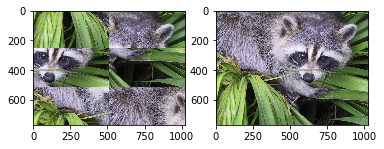

Seleccione una pieza [1 - 6]: 3
Seleccione a donde desea desplazar esta pieza:
1. Arriba
2. Abajo
3. Izquierda
4. Derecha
Seleccione una opción: 3


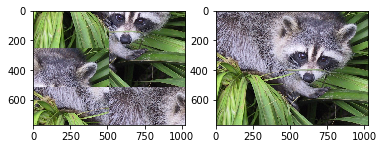

Seleccione una pieza [1 - 6]: 6
Seleccione a donde desea desplazar esta pieza:
1. Arriba
2. Abajo
3. Izquierda
4. Derecha
Seleccione una opción: 1


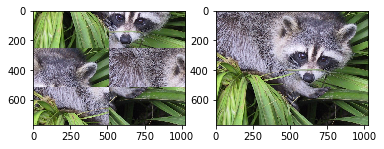

Seleccione una pieza [1 - 6]: 4
Seleccione a donde desea desplazar esta pieza:
1. Arriba
2. Abajo
3. Izquierda
4. Derecha
Seleccione una opción: 3


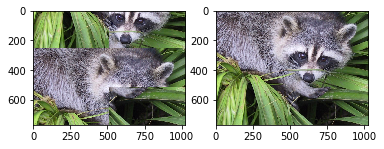

Seleccione una pieza [1 - 6]: 2
Seleccione a donde desea desplazar esta pieza:
1. Arriba
2. Abajo
3. Izquierda
4. Derecha
Seleccione una opción: 2


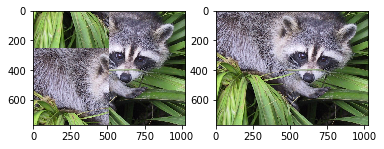

Seleccione una pieza [1 - 6]: 1
Seleccione a donde desea desplazar esta pieza:
1. Arriba
2. Abajo
3. Izquierda
4. Derecha
Seleccione una opción: 2


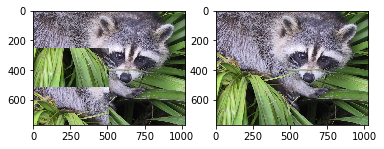

Seleccione una pieza [1 - 6]: 2
Seleccione a donde desea desplazar esta pieza:
1. Arriba
2. Abajo
3. Izquierda
4. Derecha
Seleccione una opción: 2


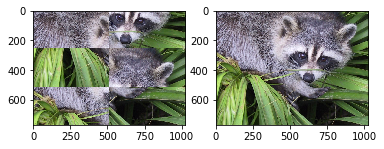

Seleccione una pieza [1 - 6]: 1
Seleccione a donde desea desplazar esta pieza:
1. Arriba
2. Abajo
3. Izquierda
4. Derecha
Seleccione una opción: 2


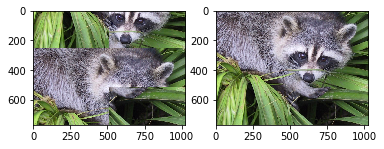

Seleccione una pieza [1 - 6]: 1
Seleccione a donde desea desplazar esta pieza:
1. Arriba
2. Abajo
3. Izquierda
4. Derecha
Seleccione una opción: 2


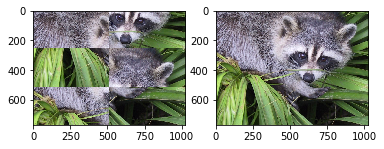

Seleccione una pieza [1 - 6]: 1
Seleccione a donde desea desplazar esta pieza:
1. Arriba
2. Abajo
3. Izquierda
4. Derecha
Seleccione una opción: 2


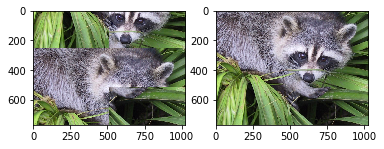

Seleccione una pieza [1 - 6]: 1
Seleccione a donde desea desplazar esta pieza:
1. Arriba
2. Abajo
3. Izquierda
4. Derecha
Seleccione una opción: 2


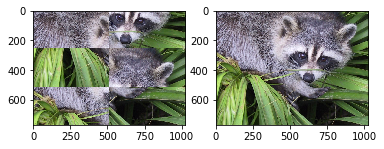

Seleccione una pieza [1 - 6]: 3
Seleccione a donde desea desplazar esta pieza:
1. Arriba
2. Abajo
3. Izquierda
4. Derecha
Seleccione una opción: 2


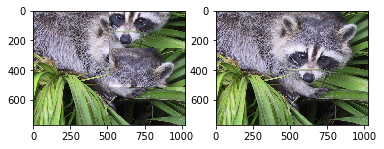

Seleccione una pieza [1 - 6]: 2
Seleccione a donde desea desplazar esta pieza:
1. Arriba
2. Abajo
3. Izquierda
4. Derecha
Seleccione una opción: 2


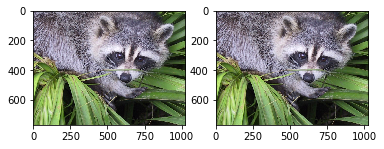

---------Rompecabezas terminado---------


In [11]:
main()